In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
df = pd.read_csv('data.csv')

In [3]:
mean = df.groupby('segments').mean().time
std = df.groupby('segments').std(ddof=1).time

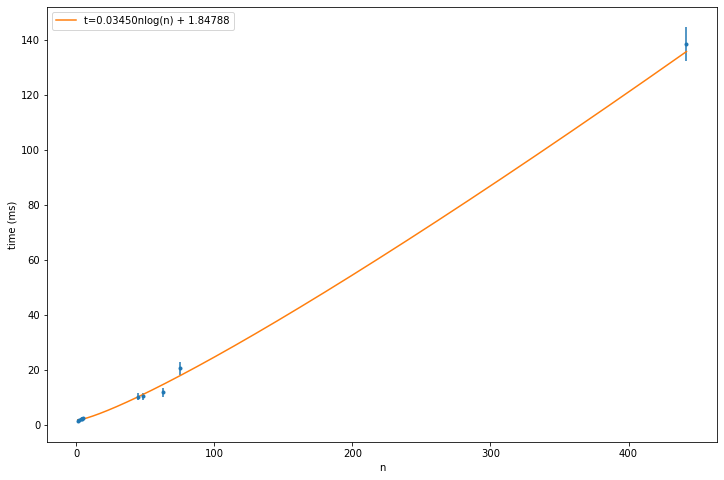

In [4]:
x = mean.index
nlogn = x*np.log2(x)
y = mean


model = lambda x, a, b: a*x+b
popt, pcov = curve_fit(model, nlogn, y, sigma=std, absolute_sigma=True)
y_predict = model(nlogn, *popt)

xcon = np.linspace(x.min(), x.max(), 10000)
ycon = model(xcon*np.log2(xcon), *popt)

plt.figure(figsize=(12, 8))
plt.errorbar(x, y, std, marker=".", linestyle = "")
plt.plot(xcon, ycon, label=f't={popt[0]:.5f}nlog(n) + {popt[1]:.5f}')
plt.ylabel('time (ms)')
plt.xlabel('n')
plt.legend(loc="upper left")

In [5]:
rsq = ((y_predict - y.mean())**2/std**2).sum() / ((y - y.mean())**2/std**2).sum()
rsq

0.9993092792694447

In [7]:
a, avar = popt[0], pcov[0,0]
stat = a/(np.sqrt(avar))
pvalue = 2*norm.cdf(-abs(stat))
a, avar, pvalue

(0.03449867759492163, 1.8217339838949977e-06, 4.256454978154386e-144)

In [8]:
b, bvar = popt[1], pcov[1,1]
stat = b/(np.sqrt(bvar))
pvalue = 2*norm.cdf(-abs(stat))
b, bvar, pvalue

(1.8478826603749088, 0.040179687420443665, 3.0063871190177813e-20)